In [1]:
## To start with, we need to load all the required libraries
## Importing numpy
## Importing Pandas
## Importing matplot as will require ploting for analysis
## Importing Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
## Lets load the data set csv file
os.chdir(r'C:\Users\Dell\Desktop\ML and AI\EDA\Submission 1\loan')
loan = pd.read_csv('loan.csv')

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
## We need to get some general informtion about the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
## Taking a look we see empty columns
## Lets check the amount of empty spaces
round((100*loan.isnull().sum())/len(loan.index))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [6]:
## From above, we see multiple columns with 100% of empty spaces
## Lets remove them as they are not required
loan.dropna(axis=1,how='all',inplace=True)

In [7]:
## Lets check the previous line output
round((100*loan.isnull().sum())/len(loan.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [8]:
## While we have deleted columns 100% empty, columns with very high amount of empty spaces are not required
## Deleting columns with high empty spaces
loan.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [10]:
## Lets see the output of the previous line
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [11]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
##Now that we have cleaned the columns 
## Next step is to check same for the rows
round((100*loan.isnull().sum(axis=1))/len(loan.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [13]:
## We dont see any rows being 100% empty
## As we are working on the target being defaulter/nondefaulter
## values giving that information is whether the loan is paid off or not
## In the data set Fully paid = Non Defaulter, Charged Off = Defaulter, Current = loan in the repayment process
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [14]:
## Current does not give any specific information about being defaulter or non defaulter
## We need to remove rows with loan status as current
loan_status_details = ['Fully Paid','Charged Off']
loan = loan[loan['loan_status'].isin(loan_status_details)]
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
## In order to ease the analysis we need to have a numeric data type Fully Paid = 0 Charged Off= 1
loan['loan_status'] = loan['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
##Creating a new column as years
loan['year']=loan['issue_d'].apply(lambda x:x.split('-')[1])
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11


In [18]:
## Convert the data type from string to int for years
loan['year'] = loan['year'].astype(np.int)
type(loan['year'][0])

numpy.int32

In [39]:
# Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

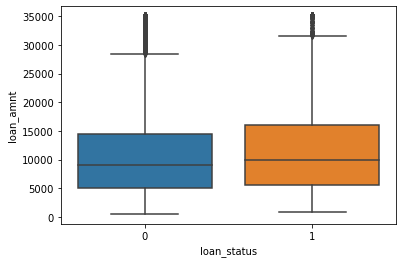

In [40]:
#Plotting
sb.boxplot(y = loan['loan_amnt'],x = loan['loan_status'])
plt.show()

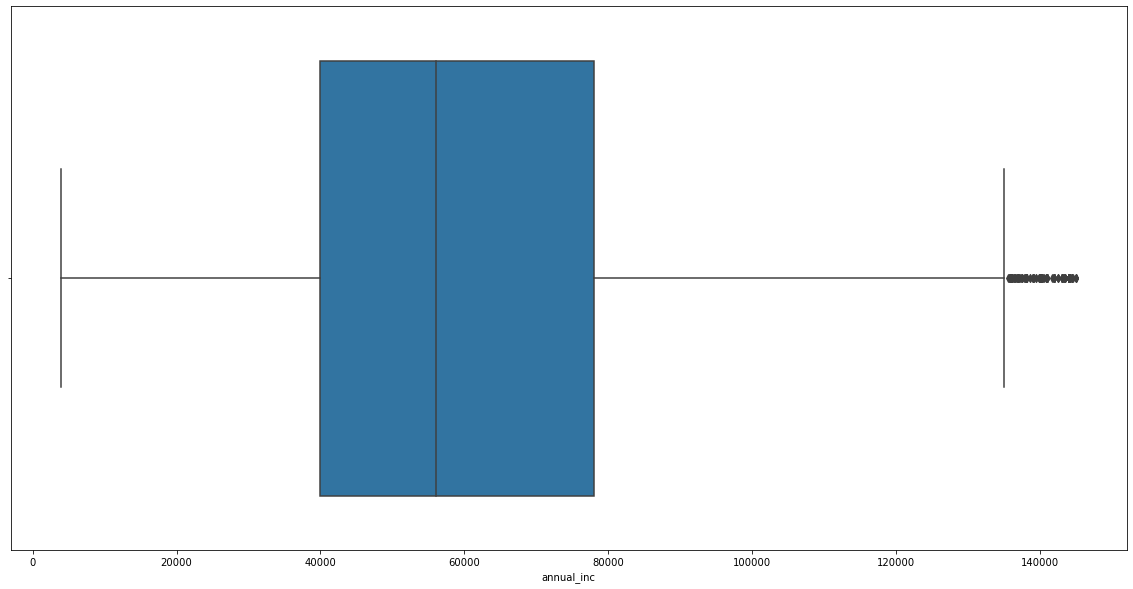

In [41]:
## Outlier Treatment
## annual_inc
## dti
## loan_amount
## funded_amnt_inv
plt.figure(figsize=(20,10))
sb.boxplot(x=loan["annual_inc"])
plt.show()

In [22]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    return lower_range,upper_range

In [23]:
## Shape before dropping outliers
loan.shape

(38577, 55)

In [25]:
## Removing outliers on annual_inc
LL,UL=removeOutliers(loan,"annual_inc")
print('lower_limit  ',LL)
print('upper_limit   ',UL)

IQR value for column annual_inc is: 42000.0
lower_limit   -23000.0
upper_limit    145000.0


In [26]:
#we can see the lower limit of annula_inc is in negative value
#Here we can ignore lower_limit and filter data with upper limit otherwise zero cane be assigned as lower_limit
loan = loan[loan["annual_inc"]<UL]

In [27]:
## post removal of outliers
loan.shape

(36754, 55)

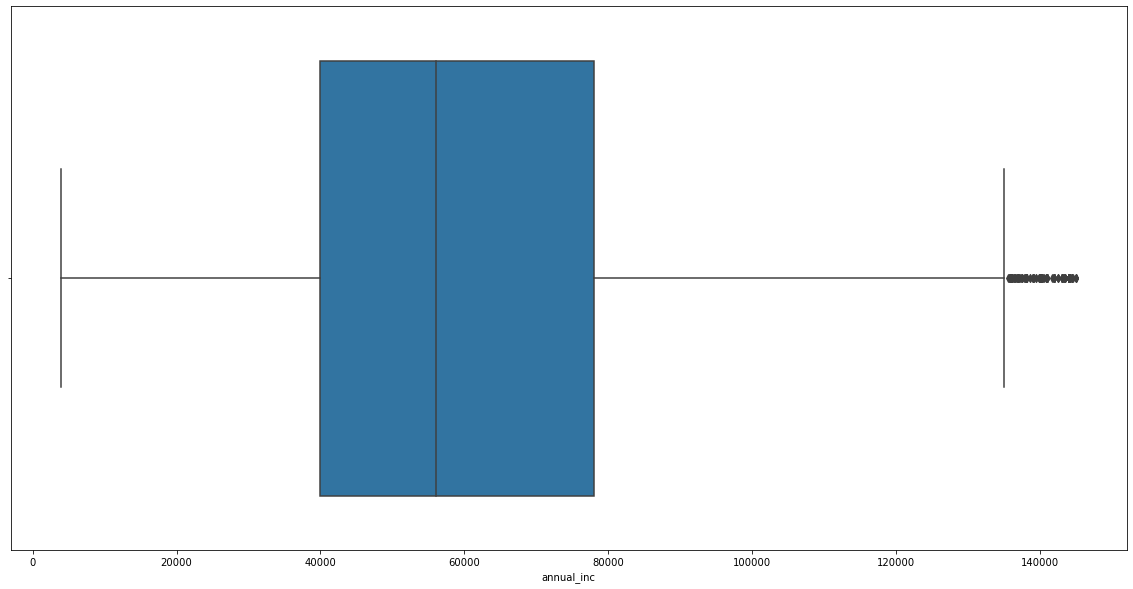

In [42]:
##Ploting after we remove the outliers
plt.figure(figsize=(20,10))
sb.boxplot(x=loan["annual_inc"])
plt.show()

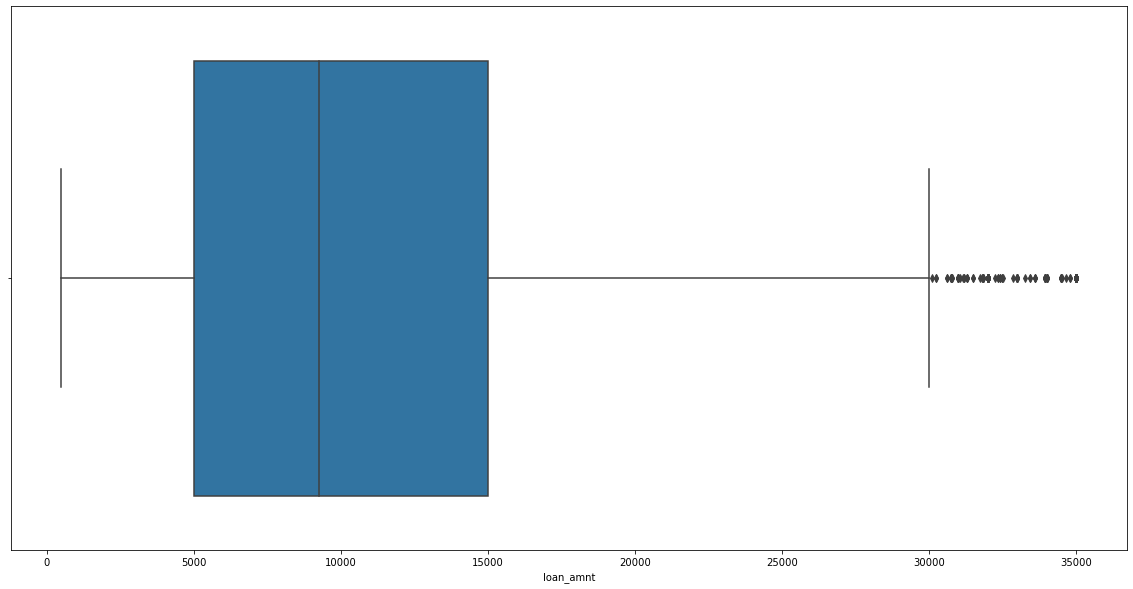

In [43]:
## Plotting for dti
plt.figure(figsize=(20,10))
sb.boxplot(x=loan["loan_amnt"])
plt.show()

Text(0.5, 1.0, 'Loan_status Distribution - Percentage')

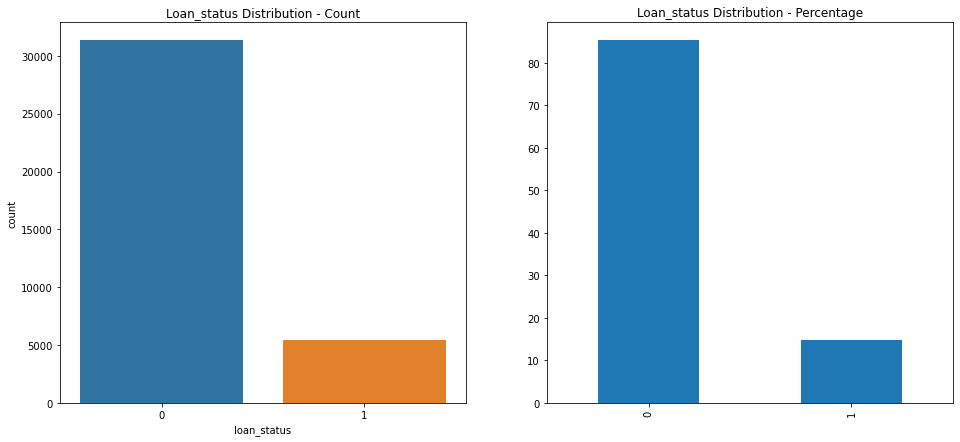

In [44]:
## Here we are going to visualize loan status column
plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
sb.countplot(x=loan['loan_status'])
plt.title('Loan_status Distribution - Count')

plt.subplot(1, 2, 2)
((loan['loan_status'].value_counts()*100/len(loan)).sort_values(ascending=False)).plot(kind='bar')
plt.title('Loan_status Distribution - Percentage')

In [33]:
## Now that we have cleaned the data, also the target column
## We can check the % of default loans and non default loans
round((loan['loan_status'].value_counts()*100/len(loan)).sort_values(ascending=False),2)

0    85.23
1    14.77
Name: loan_status, dtype: float64

In [45]:
## In the above out[33] we can see 0 and 1, as we have represented 0 = Paid off 1 = charged off
## We can also check the count of these loans
loan['loan_status'].value_counts()

0    31325
1     5429
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='grade'>

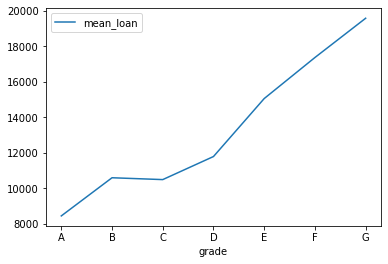

In [47]:
## We can see that majority of the loans are paid in full
## We can Check the loan payment wrt to the grade of the loans
loan.groupby(['grade'],as_index=False).agg(total_loan = ('loan_amnt','sum'),mean_loan = ('loan_amnt','mean')).plot.line(x = 'grade',y = 'mean_loan')

In [ ]:
## Here we observe that Grade A loans are of basic category while the Grade increases towards G

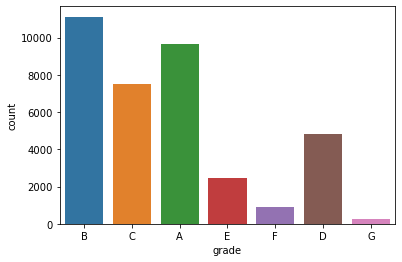

In [59]:
sb.countplot(x=loan['grade'])
plt.show()

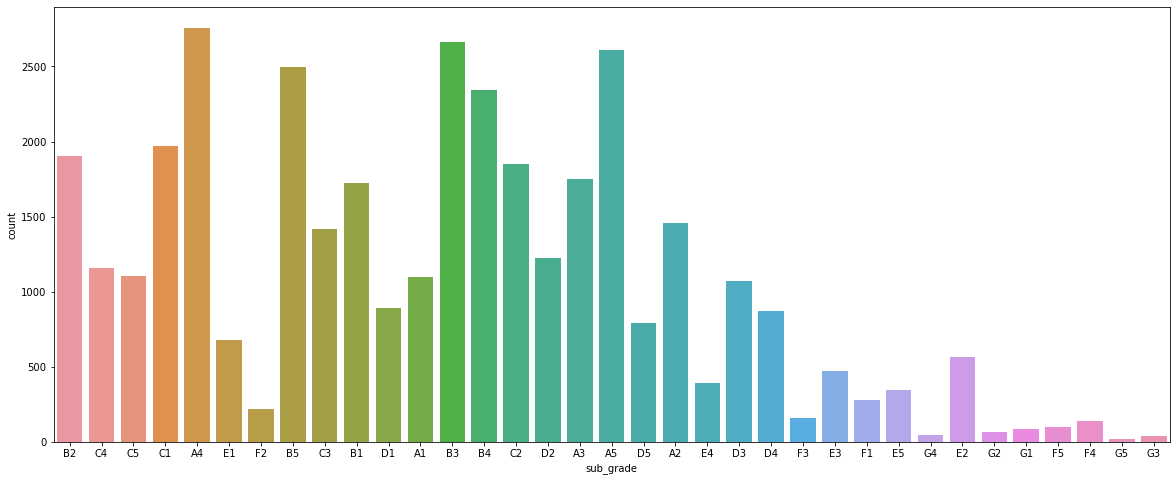

In [49]:
## Lets check the count of loans wrt the sub grades
plt.figure(figsize = (20,8))
sb.countplot(x=loan['sub_grade'])
plt.show()

In [ ]:
## Above we see that majority loans fall in the A and B category

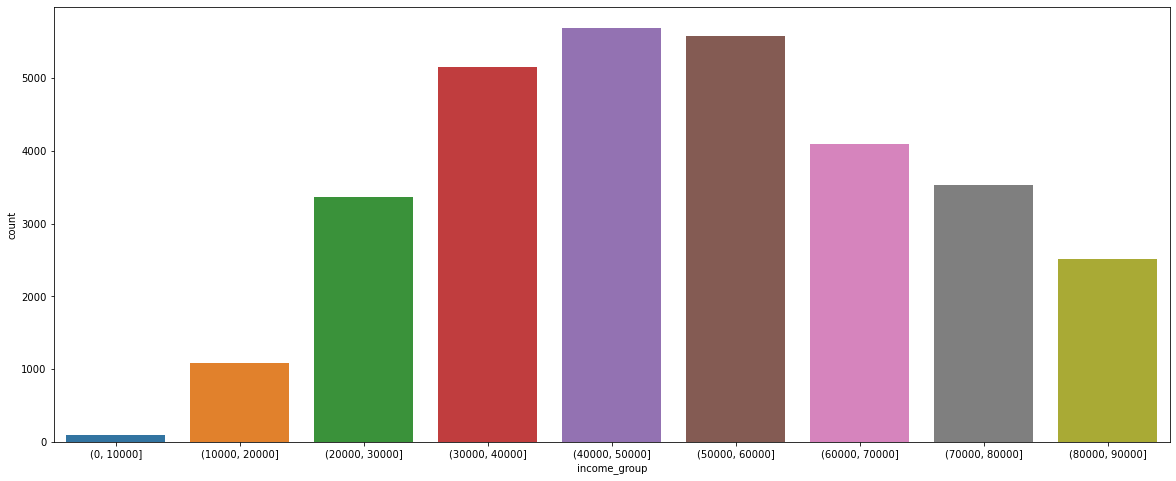

In [51]:
# lets check number of loans vs income group
loan['income_group'] = pd.cut(loan['annual_inc'], [x for x in range(0, 100000, 10000)])
# Range End at 100000 for visuals, there is data beyond 100000.


plt.figure(figsize = (20,8))
sb.countplot(x=loan['income_group'])
plt.show()

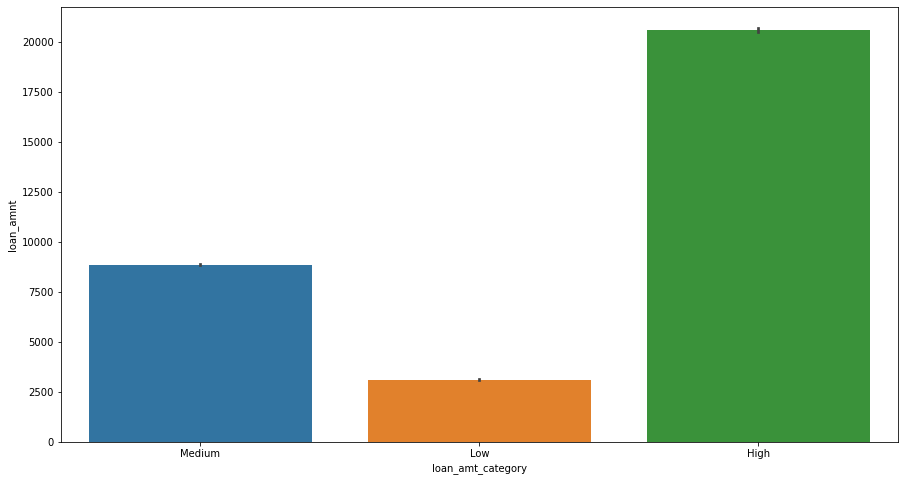

In [52]:
# Segmenting Loans to category
loan['loan_amt_category'] = loan['loan_amnt'].apply(lambda x: 'Low' if x<5000 else ( 'Medium' if (x>=5000 and x<15000) else 'High'))

loan['loan_amt_category'].value_counts()

# Plot Loans as per category
plt.figure(figsize = (15,8))
sb.barplot(x=loan['loan_amt_category'], y=loan['loan_amnt'], data=loan)
plt.show()

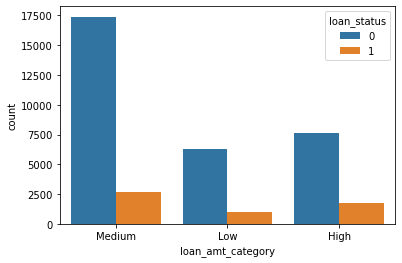

In [60]:
## Here we are going to check which category of loans get charged off
sb.countplot(x=loan['loan_amt_category'],hue=loan['loan_status'])
plt.show()

In [ ]:
## Above we can see that Medium category loans are mostly charged off

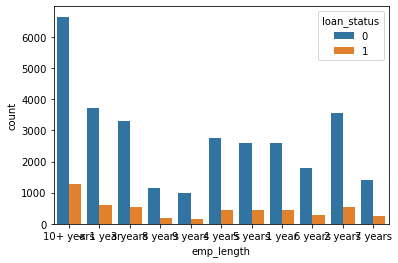

In [54]:
## lets check the employment length vs loan status now
sb.countplot(x=loan['emp_length'], hue=loan['loan_status'])
plt.show()

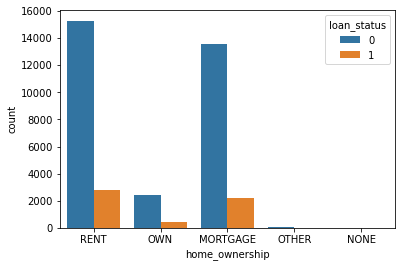

In [55]:
## Similarly we can check what is the home ownership situation for charged off candidates
sb.countplot(x=loan['home_ownership'], hue=loan['loan_status'])
plt.show()

In [ ]:
## We can see that max. candidate whose loans are charged off have rented places

<AxesSubplot:xlabel='purpose', ylabel='total_loan'>

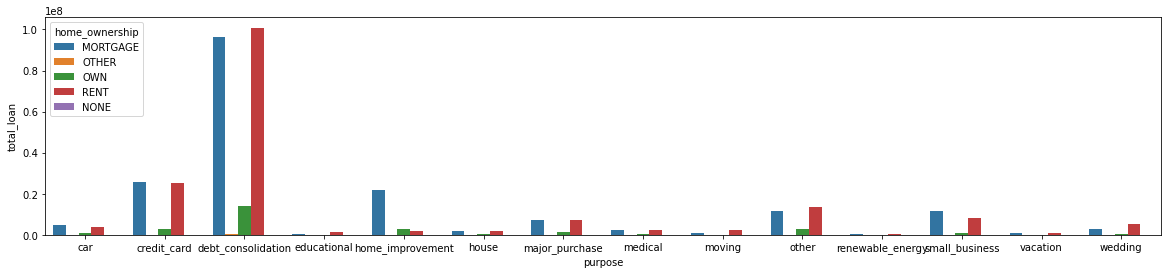

In [57]:
# Plotting Purpose and Home Ownership
loan_home_pupose = loan.groupby(['purpose','home_ownership']).agg(total_loan = ('loan_amnt','sum'))
loan_home_pupose.reset_index(inplace = True)
plt.figure(figsize = (20,4))
sb.barplot(x = loan_home_pupose['purpose'],y = loan_home_pupose['total_loan'],hue=loan_home_pupose['home_ownership'],)

In [ ]:
## As seen above the loans are charged off for people who do not own a house and purpose is for debt consolidation

<AxesSubplot:label='d20c5507-2b4f-48e9-96b7-7140cada83af', xlabel='grade', ylabel='member_id'>

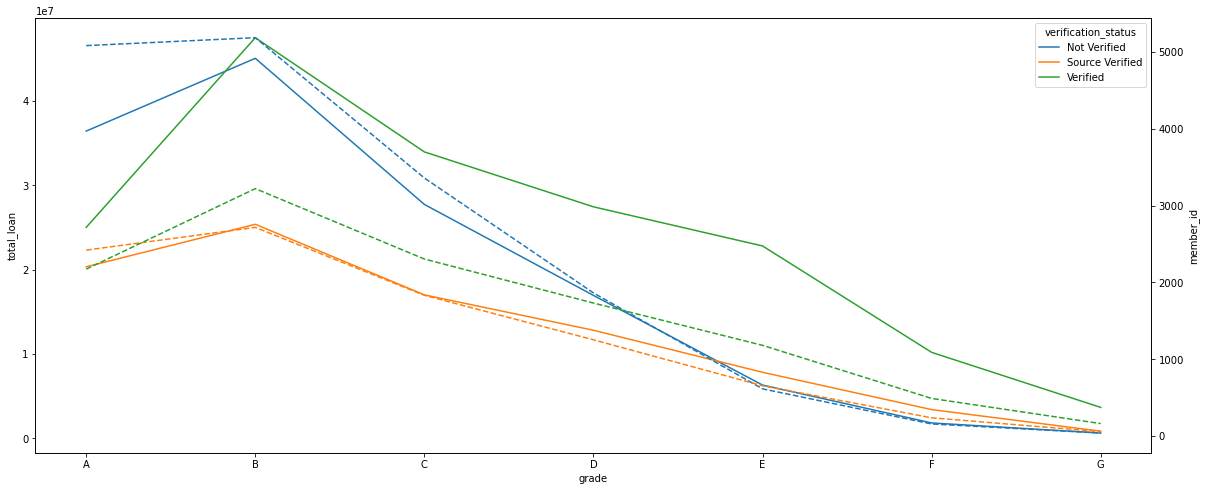

In [58]:
## When loan is granted, a process of verification takes place. Lets check the ferification vs loan status along with the grades of the loans
df_grade = loan.groupby(['grade','verification_status'],as_index=False).agg(total_loan = ('loan_amnt','sum'),mean_loan = ('loan_amnt','mean'),member_id = ('member_id','count'))
plt.figure(figsize = (20,8))
sb.lineplot(x = 'grade',y= 'total_loan',hue = 'verification_status',data = df_grade)
sb.lineplot(x = 'grade',y= 'member_id',hue = 'verification_status',data = df_grade,linestyle='dashed',ax = plt.twinx(),legend = False)